# Objetivo 2.3
## Caixeiro Viagante

In [2]:
# Instalar a biblioteca q
# !python -m pip install gurobipy
import gurobipy as gp

In [1]:
# Matriz de das distancias do caixeiro viajante
matriz_distancias = [
        [0, 400, 500, 300],
        [400, 0, 300, 500],
        [500, 300, 0, 400],
        [300, 500, 400, 0]
]

In [3]:
# Índices dos pontos de origem e destino
n_Cidades = len(matriz_distancias[0])
origens = [i + 1 for i in range(n_Cidades)]  
destinos = [i + 1 for i in range(n_Cidades)]

# Dicionário das distancias
dict_distancias = dict()
for i, origem in enumerate(origens):
    for j, destino in enumerate(destinos):
        dict_distancias[origem, destino] = matriz_distancias[i][j]

In [4]:
# Modelo
m = gp.Model()

# Variáveis de decisão
x = m.addVars(origens, destinos, vtype=gp.GRB.BINARY)

#upper bond - limite superior
u = m.addVars(origens[1:], vtype=gp.GRB.INTEGER, ub=n_Cidades - 1)

# Função Objetivo
m.setObjective(x.prod(dict_distancias), sense=gp.GRB.MINIMIZE)

# Restrições que garantem que cada ponto será origem exatamente uma vez
c1 = m.addConstrs(
    gp.quicksum(x[i, j] for j in destinos if i != j) == 1
    for i in origens)

# Restrições que garantem que cada ponto será destino exatamente uma vez
c2 = m.addConstrs(
    gp.quicksum(x[i, j] for i in origens if i != j) == 1
    for j in destinos)

# Restrições de eliminação de subrotas
c3 = m.addConstrs(
    u[i] - u[j] + n_Cidades * x[i, j] <= n_Cidades - 1
    for i in origens[1:] for j in destinos[1:] if i != j)

# Executa o modelo
m.optimize()

Restricted license - for non-production use only - expires 2023-10-25
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 14 rows, 19 columns and 42 nonzeros
Model fingerprint: 0xeacb39a1
Variable types: 0 continuous, 19 integer (16 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [3e+02, 5e+02]
  Bounds range     [1e+00, 3e+00]
  RHS range        [1e+00, 3e+00]
Found heuristic solution: objective 1400.0000000
Presolve removed 0 rows and 4 columns
Presolve time: 0.01s
Presolved: 14 rows, 15 columns, 42 nonzeros
Variable types: 0 continuous, 15 integer (12 binary)

Root relaxation: objective 1.300000e+03, 8 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 infeasible    0      1400.00000 1400.0000

In [5]:
# Constrir o vetor com caminho optamizado
caminho = [1]
anterior = 1
for ponto in range(n_Cidades):
    for j in destinos:
        if round(x[anterior, j].X) == 1:
            caminho.append(j)
            anterior = j
            break
            
# caminho Optimizado comecando no ponto 1
print(caminho)

[1, 4, 3, 2, 1]


## N-Queens

In [12]:
import random
import gurobipy as gb
import sys
import matplotlib.pyplot as plt


n = 10
m = gb.Model()
x = m.addVars(n, n, vtype=gb.GRB.BINARY, name="x")

# one Queen per row
m.addConstrs((gb.quicksum(x[i, j] for j in range(n)) == 1 for i in range(n)))
# one queen per column
m.addConstrs((gb.quicksum(x[i, j] for i in range(n)) == 1 for j in range(n)))
# no more than one queen per "/" diagonal
m.addConstrs(gb.quicksum(x[i, j] for i in range(n) for j in range(n) if i - j == k) <= 1 for k in range(-n + 2, n - 2 + 1))
# no more than one queen per "\" diagonal
m.addConstrs(gb.quicksum(x[i, j] for i in range(n) for j in range(n) if i + j == k) <= 1 for k in range(2 * n - 1))

# Gurobi Settings
m.params.LogToConsole = 0         # silenciar o Gurobi
m.params.PoolSearchMode = 2       # forcar a procura de multiplas solucoes

m.optimize()

print(f"For n = {n} there are {m.SolCount} possible solutions")

For n = 10 there are 10 possible solutions


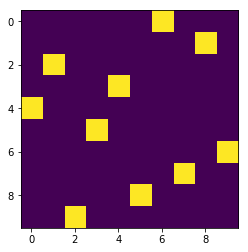

In [13]:
tabuleiro =[]
lista = []
for i in range(n):
    for j in range(n):
        lista.append(round(x[i, j].X))
    tabuleiro.append(lista)
    lista= []
        
plt.figure()
plt.imshow(tabuleiro)
plt.show()